Epoch 1/5


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9527 - loss: 0.1560 - val_accuracy: 0.9807 - val_loss: 0.0676
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9861 - val_loss: 0.0487
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9856 - val_loss: 0.0454
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9875 - val_loss: 0.0419
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9883 - val_loss: 0.0398
Test Accuracy: 0.9897


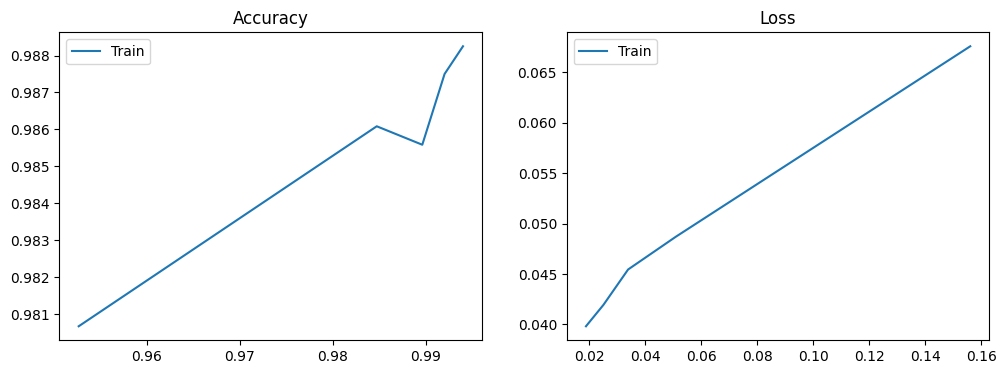

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Simple CNN model
model = tf.keras.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train','Val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Val'])
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


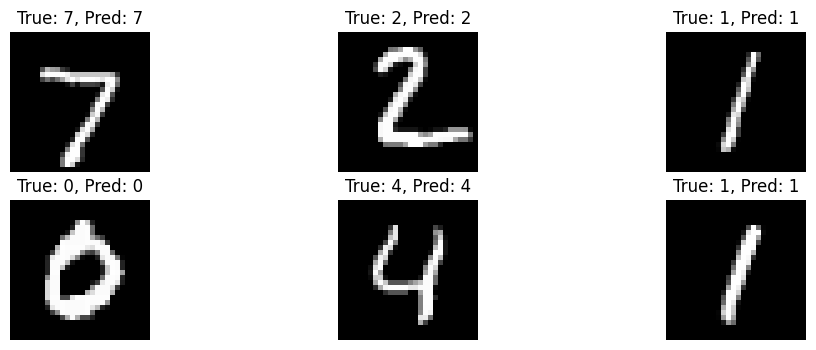

In [7]:
# Test first 6 images
import numpy as np
predictions = model.predict(x_test[:6])
predicted = np.argmax(predictions, axis=1)
actual = np.argmax(y_test[:6], axis=1)

plt.figure(figsize=(12, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {actual[i]}, Pred: {predicted[i]}')
    plt.axis('off')
plt.show()
